In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
#city_df.head()
#ride_df.head()

# Combine the data into a single dataset
merge_df = pd.merge(ride_df, city_df, on='city')
merge_df.head()
# Display the data table for preview
#merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

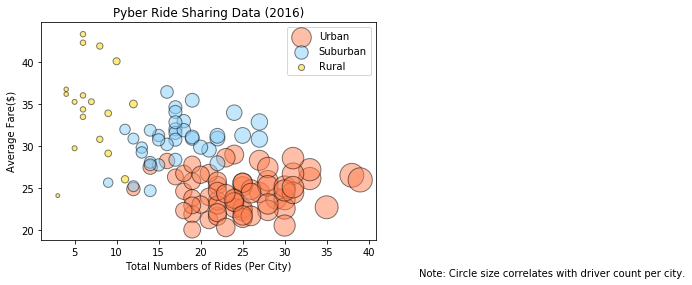

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban = merge_df.loc[(merge_df["type"] == "Urban")]
suburban = merge_df.loc[(merge_df["type"] == "Suburban")]
rural = merge_df.loc[(merge_df["type"] == "Rural")]

# Average Fare Calculation
avg_fare_urban = urban.groupby(["city"])["fare"].mean()
avg_fare_suburban = suburban.groupby(["city"])["fare"].mean()
avg_fare_rural = rural.groupby(["city"])["fare"].mean()

# Total Rides Calculation
total_rides_urban = urban.groupby(["city"]).count()["ride_id"]
total_rides_suburban = suburban.groupby(["city"]).count()["ride_id"]
total_rides_rural = rural.groupby(["city"]).count()["ride_id"]

# Total Driver Calculation
total_drivers_urban = urban.groupby(["city"])["driver_count"].value_counts()
total_drivers_suburban = suburban.groupby(["city"])["driver_count"].value_counts()
total_drivers_rural = rural.groupby(["city"])["driver_count"].value_counts()

# Build the scatter plots for each city types
plt.scatter(total_rides_urban, avg_fare_urban, s=total_drivers_urban*15,
           marker ='o', facecolors ="coral", edgecolors="black", alpha =0.5, label ="Urban")
plt.scatter(total_rides_suburban, avg_fare_suburban, s=total_drivers_suburban*10,
           marker ='o', facecolors ="lightskyblue", edgecolors="black", alpha =0.5, label ="Suburban")
plt.scatter(total_rides_rural, avg_fare_rural, s=total_drivers_rural*5,
           marker ='o', facecolors ="gold", edgecolors="black", alpha =0.5, label ="Rural")

# Incorporate the other graph properties
# Chart title
plt.title("Pyber Ride Sharing Data (2016)")
# x label
plt.xlabel("Total Numbers of Rides (Per City)")
# y label
plt.ylabel("Average Fare($)")

# Create a legend
plt.legend(loc='upper right')

# Incorporate a text label regarding circle size
plt.figtext(1,0, "Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("../Images/Pyber1.png")
plt.show()

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

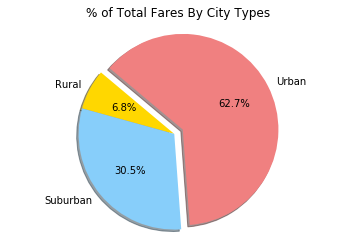

In [21]:
# Calculate Type Percents
total_fare = merge_df.groupby(["type"])["fare"].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = [0, 0, 0.1]

plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("../Images/pyber_total_fares.png")
plt.show()

In [22]:
# Show Figure
plt.show()

## Total Rides by City Type

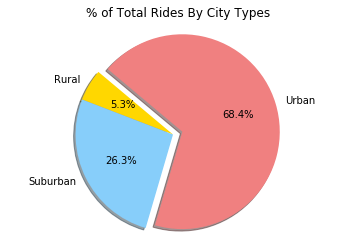

In [23]:
# Calculate Ride Percents
total_fare = merge_df.groupby(["type"])["ride_id"].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = [0, 0, 0.1]

plt.title("% of Total Rides By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("../Images/pyber_total_rides.png")
plt.show()


In [24]:
# Show Figure
plt.show()

## Total Drivers by City Type

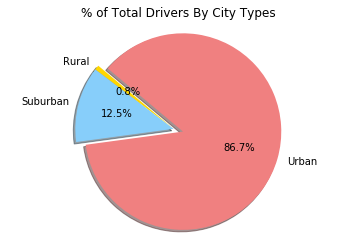

In [25]:
# Calculate Ride Percents
total_fare = merge_df.groupby(["type"])["driver_count"].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = [0, 0, 0.1]

plt.title("% of Total Drivers By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("../Images/pyber_total_drivers.png")
plt.show()


In [26]:
# Show Figure
plt.show()